# Synthetic Data Generation for MVPC  
This notebook generates synthetic datasets under **MAR** and **MNAR** missingness mechanisms, following the structure of the MVPC paper.

We use:
- A random Gaussian DAG  
- Collider detection  
- MAR or MNAR missingness indicator selection  
- Threshold‑based missingness injection  
- MCAR reference dataset  

The output includes:
- Complete data  
- Missing data (MAR or MNAR)  
- MCAR reference  
- Ground truth structure (DAG, colliders, missingness parents)


In [20]:
import sys
import os

# Path to the project root (one level above the notebooks folder)
project_root = os.path.abspath("..")

# Add to Python path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)



Project root added: c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New


In [21]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from data.synthetic_data_generation.synthetic_generator import gen_data



In [23]:
# Set Parameters


num_samples = 2000
num_var = 20
num_extra_e = 3
num_m = 6
seed = 42

p_missing_h = 0.9
p_missing_l = 0.01


In [24]:
# Generate MAR Dataset

result_mar = gen_data(
    num_samples=num_samples,
    mode="mar",
    num_var=num_var,
    num_extra_e=num_extra_e,
    num_m=num_m,
    seed=seed,
    p_missing_h=p_missing_h,
    p_missing_l=p_missing_l,
)

X_complete_mar = result_mar["data_complete"]
X_mar = result_mar["data_m"]
X_ref_mar = result_mar["data_ref"]
gt_mar = result_mar["ground_truth"]

print("MAR dataset generated.")


MAR dataset generated.


In [25]:
# Generate MNAR Dataset


result_mnar = gen_data(
    num_samples=num_samples,
    mode="mnar",
    num_var=num_var,
    num_extra_e=num_extra_e,
    num_m=num_m,
    seed=seed,
    p_missing_h=p_missing_h,
    p_missing_l=p_missing_l,
)

X_complete_mnar = result_mnar["data_complete"]
X_mnar = result_mnar["data_m"]
X_ref_mnar = result_mnar["data_ref"]
gt_mnar = result_mnar["ground_truth"]

print("MNAR dataset generated.")


MNAR dataset generated.


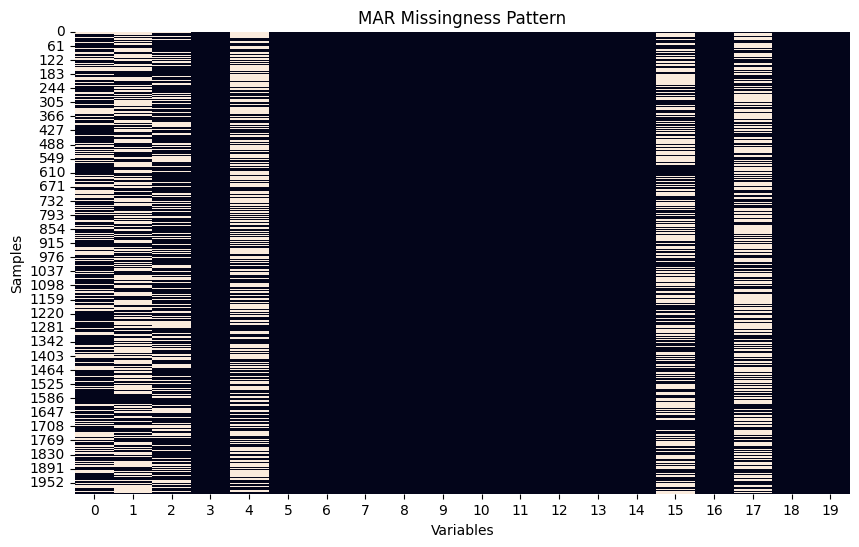

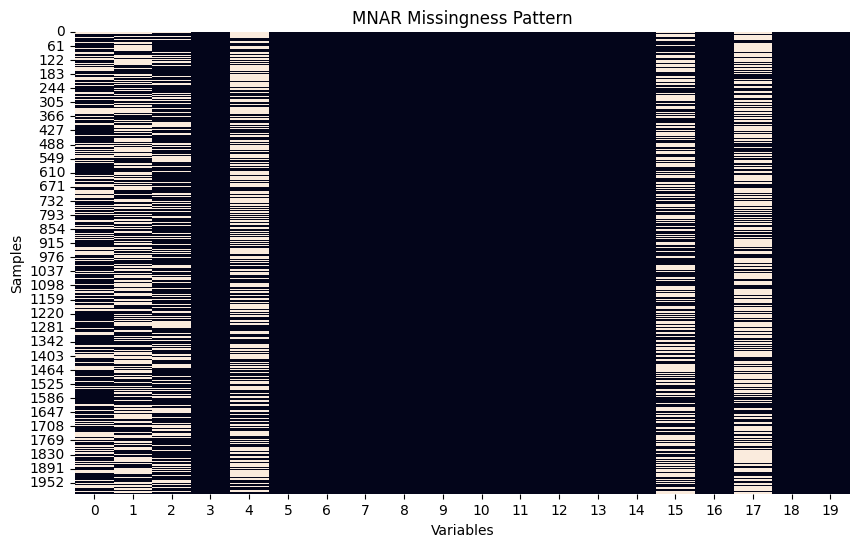

In [26]:
# Visualize Missingness Patterns

def plot_missingness(data, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.isna(data), cbar=False)
    plt.title(title)
    plt.xlabel("Variables")
    plt.ylabel("Samples")
    plt.show()

plot_missingness(X_mar, "MAR Missingness Pattern")
plot_missingness(X_mnar, "MNAR Missingness Pattern")


In [27]:
print("MAR missingness indicators:", gt_mar["m_ind"])
print("MAR missingness parents:", gt_mar["parent_m_ind"])
print("MAR colliders:", gt_mar["colliders"])

print("\nMNAR missingness indicators:", gt_mnar["m_ind"])
print("MNAR missingness parents:", gt_mnar["parent_m_ind"])
print("MNAR colliders:", gt_mnar["colliders"])


MAR missingness indicators: [np.int64(0), np.int64(4), np.int64(2), 15, 17, 1]
MAR missingness parents: [7, 7, 8, 14, 16, 1]
MAR colliders: [7, 8, 11, 12, 15, 18, 19]

MNAR missingness indicators: [np.int64(0), np.int64(4), np.int64(2), 15, 17, 1]
MNAR missingness parents: [7, 7, 8, np.int64(17), np.int64(9), np.int64(5)]
MNAR colliders: [7, 8, 11, 12, 15, 18, 19]


In [28]:
# Folder path
save_dir = "../data/synthetic_data_csv_files"

# Create folder if needed
os.makedirs(save_dir, exist_ok=True)

# Save MAR datasets
pd.DataFrame(X_complete_mar).to_csv(f"{save_dir}/complete_mar.csv", index=False)
pd.DataFrame(X_mar).to_csv(f"{save_dir}/missing_mar.csv", index=False)
pd.DataFrame(X_ref_mar).to_csv(f"{save_dir}/mcar_reference_mar.csv", index=False)

# Save MNAR datasets
pd.DataFrame(X_complete_mnar).to_csv(f"{save_dir}/complete_mnar.csv", index=False)
pd.DataFrame(X_mnar).to_csv(f"{save_dir}/missing_mnar.csv", index=False)
pd.DataFrame(X_ref_mnar).to_csv(f"{save_dir}/mcar_reference_mnar.csv", index=False)

print("All datasets saved to:", save_dir)


All datasets saved to: ../data/synthetic_data_csv_files


In [29]:
# Save ground truth structures
pd.DataFrame(gt_mar["adj"]).to_csv(f"{save_dir}/adjacency_mar.csv", index=False)
pd.DataFrame(gt_mnar["adj"]).to_csv(f"{save_dir}/adjacency_mnar.csv", index=False)

pd.DataFrame({"colliders": gt_mar["colliders"]}).to_csv(f"{save_dir}/colliders_mar.csv", index=False)
pd.DataFrame({"colliders": gt_mnar["colliders"]}).to_csv(f"{save_dir}/colliders_mnar.csv", index=False)

pd.DataFrame({"m_ind": gt_mar["m_ind"], "parent_m_ind": gt_mar["parent_m_ind"]}).to_csv(
    f"{save_dir}/missingness_structure_mar.csv", index=False
)

pd.DataFrame({"m_ind": gt_mnar["m_ind"], "parent_m_ind": gt_mnar["parent_m_ind"]}).to_csv(
    f"{save_dir}/missingness_structure_mnar.csv", index=False
)

print("Ground truth metadata saved.")


Ground truth metadata saved.
